### Importing libraries & Loading data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [5]:
# Define file path and chunk size
TRAIN_FILE_PATH = r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Data\Raw\new_train_sample.csv"  
TEST_FILE_PATH = r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Data\Raw\GUIDE_Test.csv"
CHUNK_SIZE = 50000  

In [6]:
# Function to load a large dataset easily
def data_loader(file_path, chunksize=CHUNK_SIZE):
    """
    Loads a large CSV file efficiently in chunks, cleans it, and combines it into a single DataFrame.

    Args:
        file_path (str): Path to the CSV file to be loaded.
        chunksize (int): Number of rows per chunk to load into memory. Default is CHUNK_SIZE.

    Returns:
        DataFrame: A cleaned, combined DataFrame with all chunks concatenated.
    """

    chunk_list = []  # List to store processed chunks

    for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
        chunk = chunk.drop(columns=['Unnamed: 0'], errors='ignore')
        chunk_list.append(chunk)  # Append each chunk to the list
    
    # Combine all chunks into a single DataFrame
    full_data = pd.concat(chunk_list, ignore_index=True)
    return full_data

### Let's get started with train data

In [7]:
# Load the full training dataset
train_data = data_loader(TRAIN_FILE_PATH)
pd.set_option('display.max_columns', None)
train_data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,TruePositive,NaN,NaN,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,97007,9177,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,BenignPositive,NaN,NaN,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,39978,114449,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


#### Basic EDA - Train Data

In [8]:
train_data.shape

(4758418, 45)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4758418.0,8.425237e+11,4.962194e+11,0.0,4.123169e+11,8.418136e+11,1.271310e+12,1.709397e+12
OrgId,4758418.0,1.815396e+02,3.868571e+02,0.0,1.000000e+01,4.500000e+01,1.710000e+02,6.147000e+03
IncidentId,4758418.0,7.066577e+04,1.208436e+05,0.0,5.030000e+02,1.032300e+04,8.436900e+04,5.997030e+05
AlertId,4758418.0,4.062607e+05,4.590474e+05,0.0,2.323700e+04,2.165090e+05,6.709575e+05,1.721456e+06
DetectorId,4758418.0,1.105717e+02,4.345897e+02,0.0,2.000000e+00,9.000000e+00,4.500000e+01,9.522000e+03
AlertTitle,4758418.0,2.945133e+03,1.145625e+04,0.0,2.000000e+00,1.100000e+01,1.800000e+02,1.131730e+05
DeviceId,4758418.0,9.566974e+04,1.633971e+04,0.0,9.879900e+04,9.879900e+04,9.879900e+04,9.879900e+04
Sha256,4758418.0,1.287152e+05,3.399745e+04,0.0,1.382680e+05,1.382680e+05,1.382680e+05,1.382680e+05
IpAddress,4758418.0,2.857508e+05,1.412268e+05,0.0,3.606060e+05,3.606060e+05,3.606060e+05,3.606060e+05
Url,4758418.0,1.503435e+05,3.748440e+04,0.0,1.603960e+05,1.603960e+05,1.603960e+05,1.603960e+05


In [11]:
# Checking Null Values
null_data = pd.DataFrame({
    'IsNull Count': train_data.isna().sum(),
    'IsNull %': (train_data.isna().sum() / len(train_data)) * 100
})

print(null_data)

                    IsNull Count   IsNull %
Id                             0   0.000000
OrgId                          0   0.000000
IncidentId                     0   0.000000
AlertId                        0   0.000000
Timestamp                      0   0.000000
DetectorId                     0   0.000000
AlertTitle                     0   0.000000
Category                       0   0.000000
MitreTechniques          2733136  57.437913
IncidentGrade              25775   0.541672
ActionGrouped            4730205  99.407093
ActionGranular           4730205  99.407093
EntityType                     0   0.000000
EvidenceRole                   0   0.000000
DeviceId                       0   0.000000
Sha256                         0   0.000000
IpAddress                      0   0.000000
Url                            0   0.000000
AccountSid                     0   0.000000
AccountUpn                     0   0.000000
AccountObjectId                0   0.000000
AccountName                    0

##### Points to note from Basic EDA of train_data
- Number of data entries in training data: 4.75million
- Number of features: 44
- Target variable: IncidentGrade (has 0.54% null values)
- Data types: float64 = 1; int64 = 30; object = 14
- Columns with > 50% null values: 10

### Now load test data

In [12]:
# Load the full testing dataset
test_data = data_loader(TEST_FILE_PATH)
pd.set_option('display.max_columns', None)
test_data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


#### Basic EDA - Test Data

In [13]:
test_data.shape

(4147992, 46)

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [15]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4147992.0,8.462250e+11,4.923351e+11,1.0,4.209068e+11,8.418136e+11,1.271310e+12,1.709397e+12
OrgId,4147992.0,1.756698e+02,3.708729e+02,0.0,8.000000e+00,4.300000e+01,1.730000e+02,6.138000e+03
IncidentId,4147992.0,6.780345e+04,1.178736e+05,3.0,4.110000e+02,8.818000e+03,7.944000e+04,5.997000e+05
AlertId,4147992.0,4.072191e+05,4.550578e+05,0.0,2.365900e+04,2.228970e+05,6.711010e+05,1.721457e+06
DetectorId,4147992.0,1.008391e+02,4.082934e+02,0.0,2.000000e+00,7.000000e+00,3.900000e+01,9.520000e+03
AlertTitle,4147992.0,2.529514e+03,1.044138e+04,0.0,2.000000e+00,9.000000e+00,1.160000e+02,1.131690e+05
DeviceId,4147992.0,9.575061e+04,1.615628e+04,0.0,9.879900e+04,9.879900e+04,9.879900e+04,9.879900e+04
Sha256,4147992.0,1.283939e+05,3.457595e+04,0.0,1.382680e+05,1.382680e+05,1.382680e+05,1.382680e+05
IpAddress,4147992.0,2.873898e+05,1.400920e+05,0.0,3.606060e+05,3.606060e+05,3.606060e+05,3.606060e+05
Url,4147992.0,1.504279e+05,3.734754e+04,0.0,1.603960e+05,1.603960e+05,1.603960e+05,1.603960e+05


In [16]:
# Checking Null Values
null_data = pd.DataFrame({
    'IsNull Count': test_data.isna().sum(),
    'IsNull %': (test_data.isna().sum() / len(test_data)) * 100
})

print(null_data)

                    IsNull Count   IsNull %
Id                             0   0.000000
OrgId                          0   0.000000
IncidentId                     0   0.000000
AlertId                        0   0.000000
Timestamp                      0   0.000000
DetectorId                     0   0.000000
AlertTitle                     0   0.000000
Category                       0   0.000000
MitreTechniques          2307104  55.619779
IncidentGrade                  0   0.000000
ActionGrouped            4146079  99.953881
ActionGranular           4146079  99.953881
EntityType                     0   0.000000
EvidenceRole                   0   0.000000
DeviceId                       0   0.000000
Sha256                         0   0.000000
IpAddress                      0   0.000000
Url                            0   0.000000
AccountSid                     0   0.000000
AccountUpn                     0   0.000000
AccountObjectId                0   0.000000
AccountName                    0

In [17]:
test_data['Usage'].unique()

array(['Private', 'Public'], dtype=object)

##### Points to note from Basic EDA of test_data
- Number of data entries in training data: 4.14 million
- Number of features: 45
- Target variable: IncidentGrade (has 0% null values)
- Data types: float64 = 1; int64 = 30; object = 15
- Columns with > 50% null values: 10
- The column 'Usage' in test_data has only 2 unique values but does not provide relevant information for predicting IncidentGrade & is not present in train_data 

In [18]:
def clean_data(df, is_train=True, target_col='IncidentGrade'):
    """
    Cleans the dataset by:
    - Dropping columns with >50% missing values
    - Dropping rows with missing target value (train only)
    - Removing 'Usage' column if present (test only)
    - Removing duplicates
    - Extract features from Timestamp for further EDA
    
    Args:
        df (DataFrame): input dataset
        is_train (bool): True for train set, False for test set
        target_col (str): name of the target column (default 'IncidentGrade')

    Returns:
        DataFrame: cleaned dataset
    """
    # Drop columns with >50% missing values
    df = df.dropna(thresh=len(df) * 0.5, axis=1)

    # Drop rows with null target value (only in train)
    if is_train and target_col in df.columns:
        df = df.dropna(subset=[target_col])

    # Drop 'Usage' column if it exists (test set usually contains it)
    if not is_train and 'Usage' in df.columns:
        df = df.drop(columns=['Usage'])

    # Drop duplicates
    df = df.drop_duplicates(ignore_index=True)

    # Converting Timestamp to date time & extracting features from it for time-series analysis
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.day
    df['Hour'] = df['Timestamp'].dt.hour
    
    # Day of week: 0 = Monday, 6 = Sunday
    df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
    # Flag: 1 if weekend (Saturday/Sunday), 0 otherwise
    df['isWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    df.drop(columns='Timestamp',inplace=True)

    return df

In [19]:
# Cleaning train_data
train_data = clean_data(train_data, is_train=True)
train_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek,isWeekend
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,2024,6,6,5,3,0
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,3,10,0,0
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,13,3,3,0
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,2024,6,8,16,5,1
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,2024,6,9,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577395,103079215470,142,93987,15739,112,7836,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,360606,160396,441377,308666,425863,453297,153085,869,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,10,10,0,0
4577396,1683627184337,36,1001,257479,2,2,CommandAndControl,FalsePositive,User,Impacted,98799,138268,360606,160396,32117,96088,32986,36982,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,11,19,1,0
4577397,1597727836318,851,31194,1518250,1,1,InitialAccess,BenignPositive,MailMessage,Related,98799,138268,360606,160396,441377,42275,425863,453297,153085,402271,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,9,4,6,1
4577398,137438957239,12,2419,1203,16,1334,Impact,BenignPositive,Ip,Related,98799,138268,546,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,21,23,1,0


In [20]:
# Cleaning test_data
test_data = clean_data(test_data, is_train=False)
test_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek,isWeekend
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,22,1,0
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,2024,6,3,12,0,0
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,2024,6,8,3,5,1
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,12,12,2,0
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,6,17,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922690,171798692464,42,391,638112,135,7322,Malware,BenignPositive,Machine,Impacted,4,138268,360606,160396,441377,673934,425863,453297,4,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,2024,6,3,20,0,0
3922691,541165881145,262,3017,227156,139,120,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,3,1,0
3922692,438086666953,1323,31001,304819,219,196,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,19,1,0
3922693,1297080124487,47,3653,7243,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,15,0,5,1


After applying the clean_data() function, all the null values & duplicate rows are handled & the columns of train_data and test_data are the same. Now we can do further EDA on the cleaned dataset

In [21]:
num_train_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
num_train_features

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'OSFamily',
 'OSVersion',
 'CountryCode',
 'State',
 'City',
 'Year',
 'Month',
 'Day',
 'Hour',
 'DayOfWeek',
 'isWeekend']

In [31]:
cat_train_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']
cat_train_features

['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

In [ ]:
train_data['IncidentGrade'].value_counts()

Percentage distribution of classes in Target variable (IncidentGrade):


IncidentGrade
BenignPositive    43.123673
TruePositive      35.150020
FalsePositive     21.726308
Name: count, dtype: float64

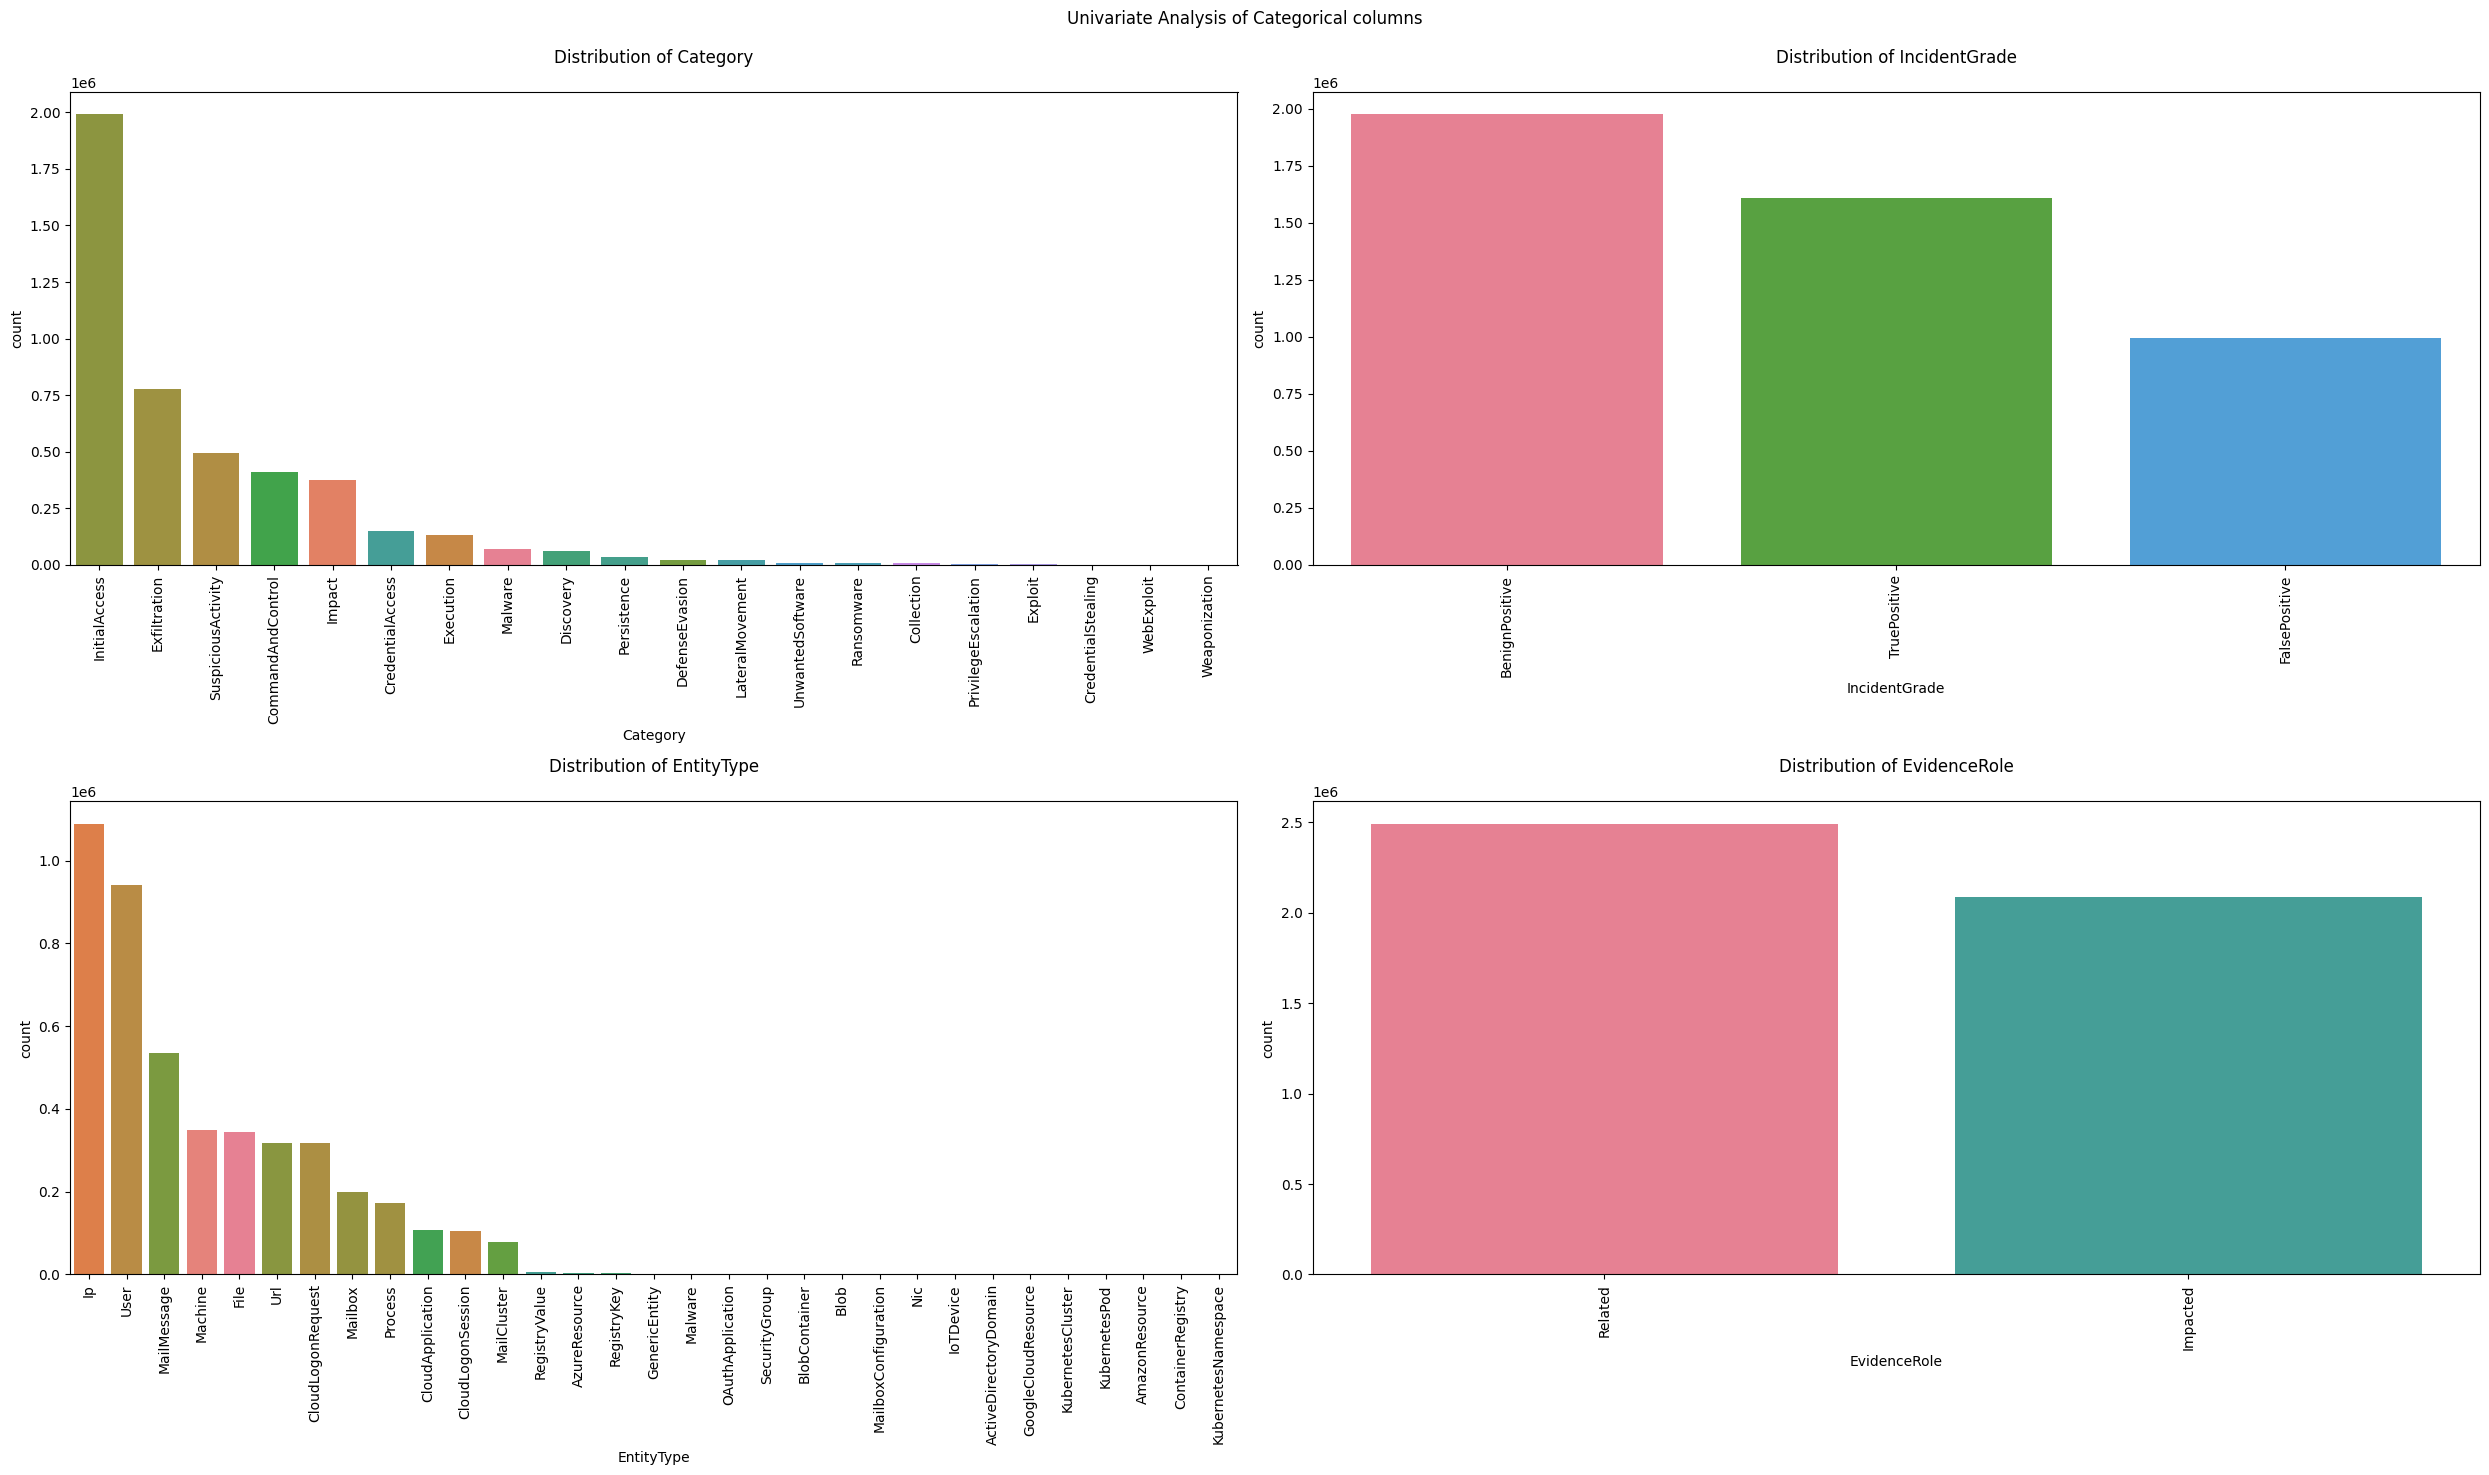

In [58]:
plt.figure(figsize=(25, 15))
plt.suptitle('Univariate Analysis of Categorical columns\n')

i = 1
for column in cat_train_features:
    plt.subplot(2, 2, i)
    order = train_data[column].value_counts().index
    sns.countplot(data=train_data, x=column, order=order, hue=column, palette='husl', legend=False)
    plt.title(f'Distribution of {column}\n')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    i+=1

plt.tight_layout()
plt.show()

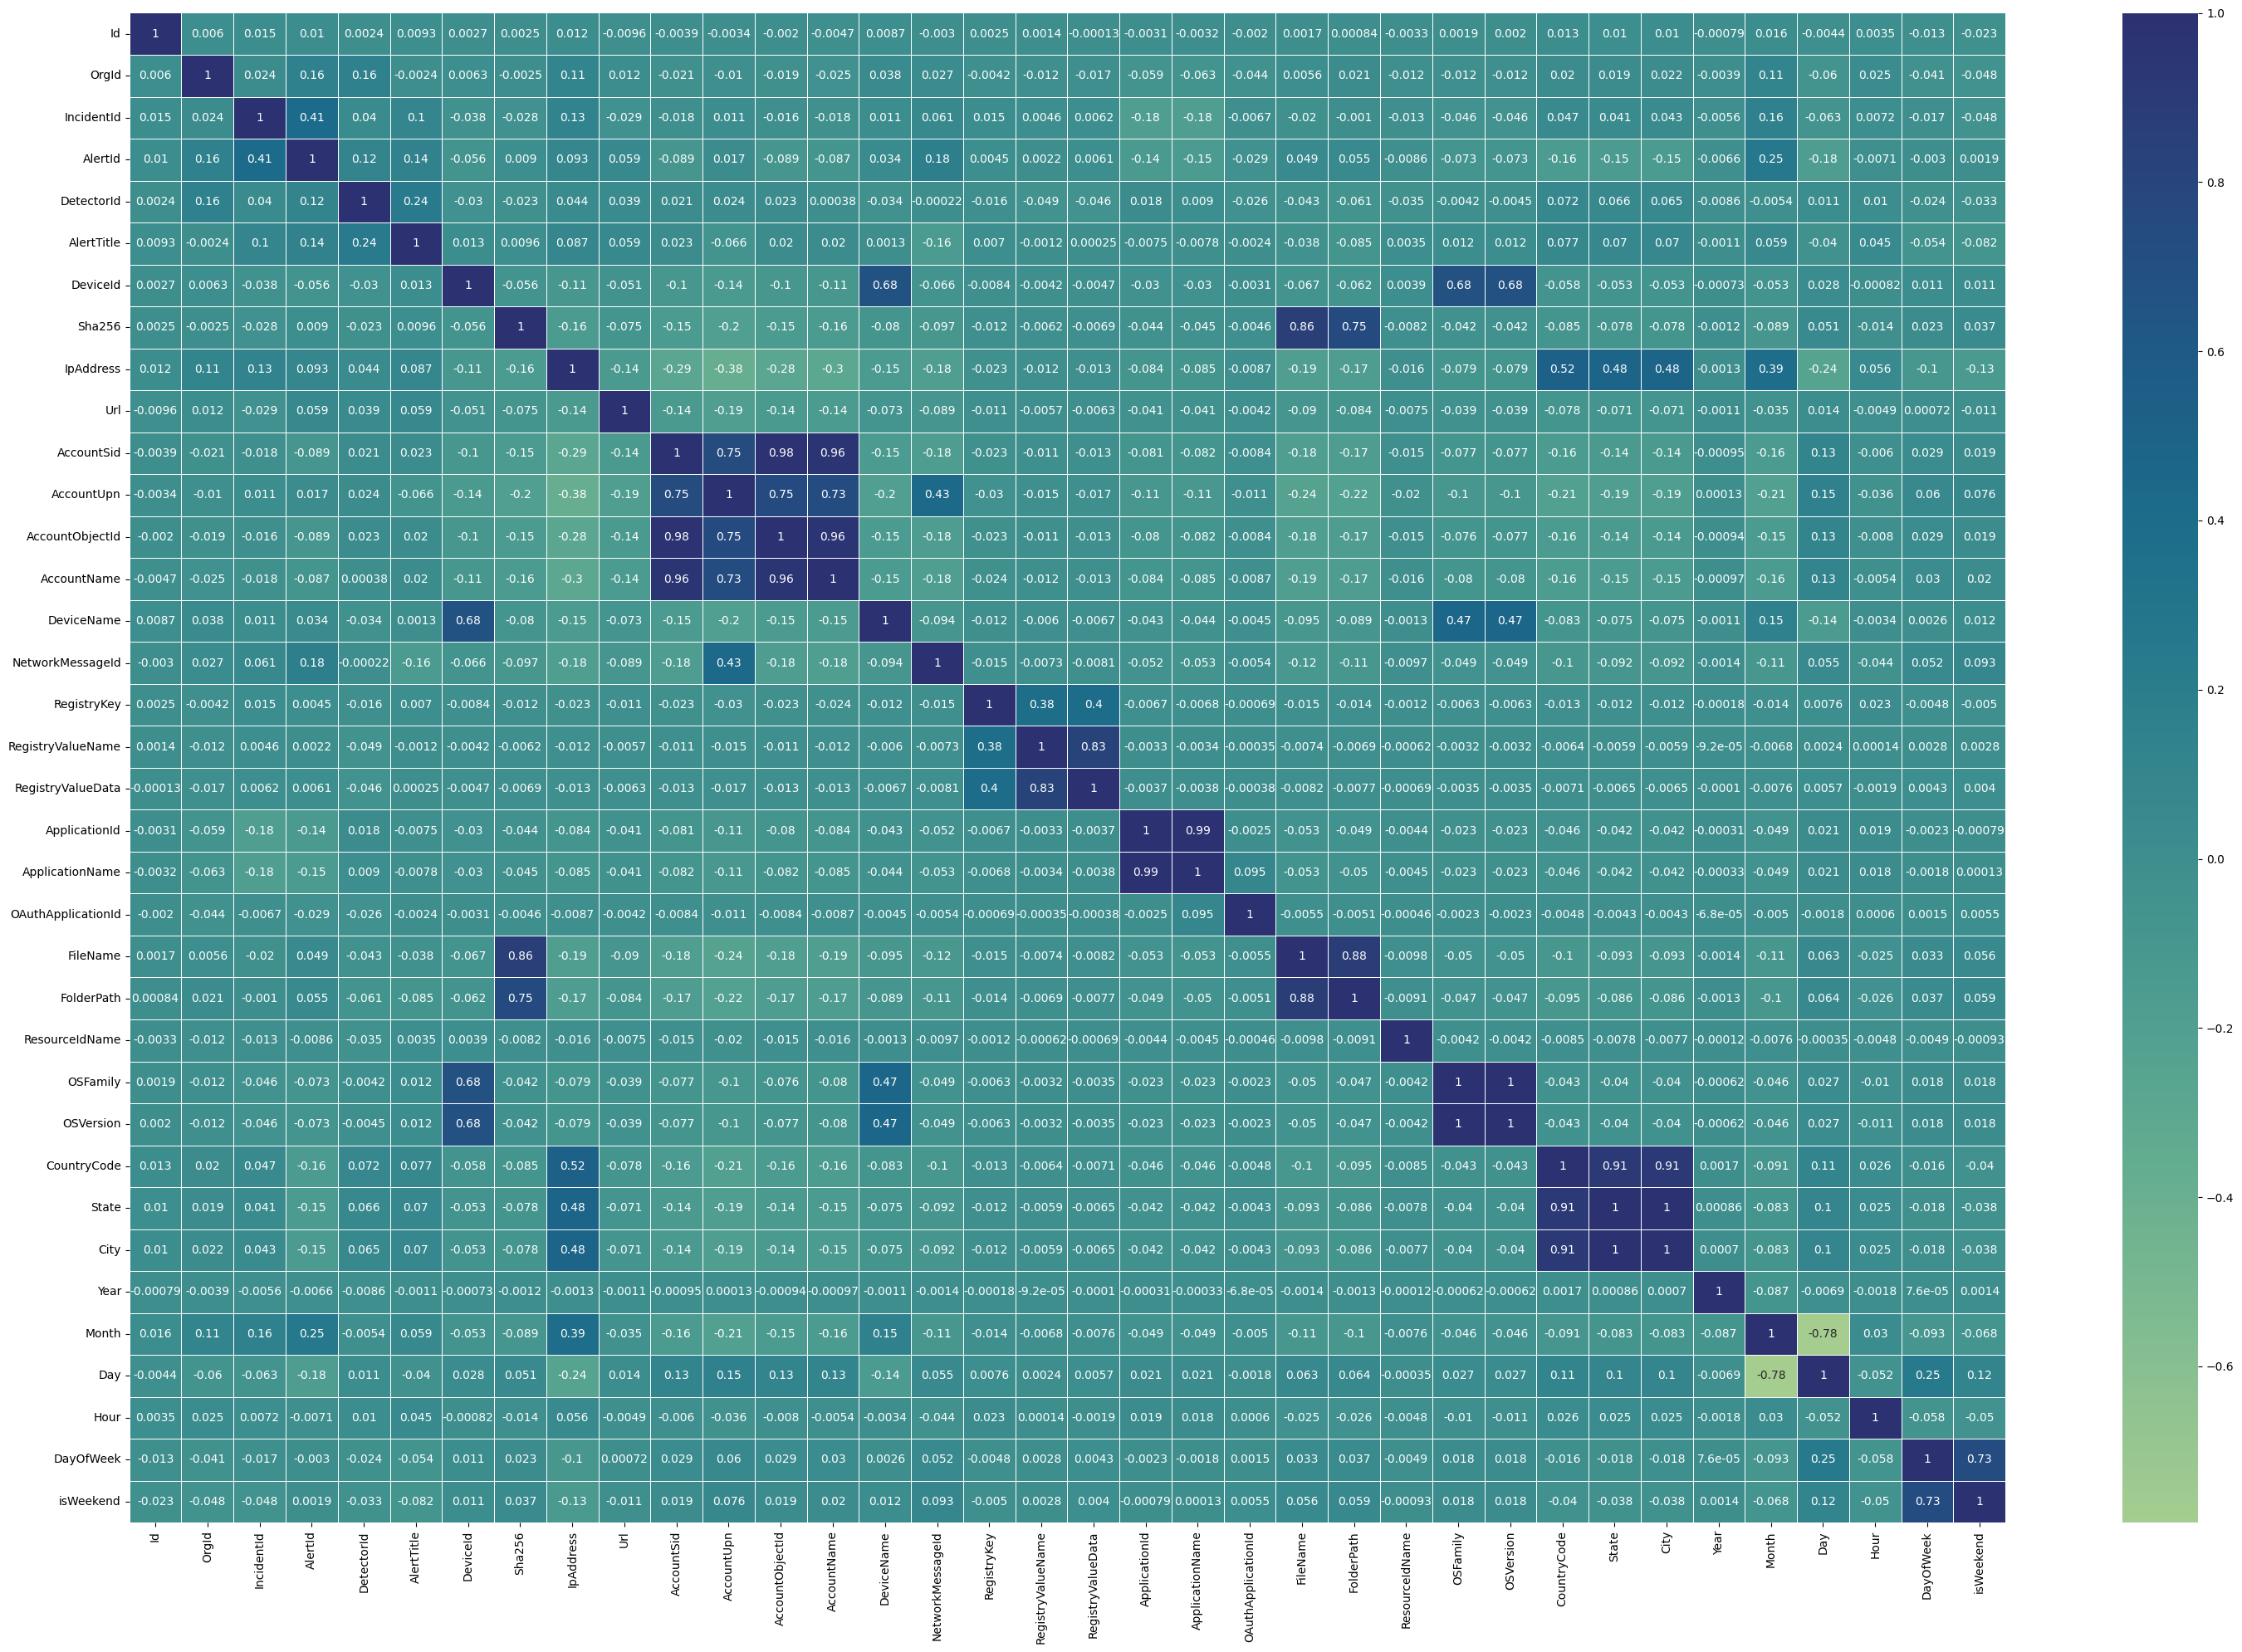

In [ ]:
plt.figure(figsize = (30, 20))
sns.heatmap(train_data[num_train_features].corr(), cmap = 'crest', annot = True, linewidth = 0.5)
plt.tight_layout()  
plt.show()

**Highly Correlated Features (Multicollinearity)**

**Features with correlation ≥ 0.8 are redundant, so we should keep only one from each pair.**

- AccountObjectId (0.98) and AccountSid (0.75) & AccountUpn (0.75) → Dropping AccountSid & AccountUpn
- FileName (0.86) and Sha256 → Dropping Sha256 
- FolderPath (0.75) and FileName → Dropping FolderPath 
- RegistryValueName (0.83) and RegistryValueData → Dropping RegistryValueName.
- ApplicationId (0.99) and ApplicationName → Dropping ApplicationId.
- OSFamily (1.00) and OSVersion → Dropping OSFamily.
- State, City, and CountryCode (0.91 correlation) → Dropping State and City.
  
**Low-Impact Features**

**These have near-zero correlation with other features, making them less informative.**

- OAuthApplicationId → Very low correlation, can be dropped.
- ResourceIdName → Low correlation, not very useful.
- RegistryKey → Low correlation, likely not impactful.

In [72]:
# List of features to drop
features_to_drop = [
    "AccountSid", "AccountUpn", "Sha256", "FolderPath", "RegistryValueName", "ApplicationId",
    "OSFamily", "State", "City", "OAuthApplicationId", "ResourceIdName", "RegistryKey"
]

# Drop the selected columns from the dataset
train_data = train_data.drop(columns=features_to_drop)
print("Remaining Features:", train_data.columns)

Remaining Features: Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'IpAddress', 'Url', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryValueData', 'ApplicationName', 'FileName',
       'OSVersion', 'CountryCode', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek',
       'isWeekend'],
      dtype='object')


In [73]:
train_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1973943
TruePositive      1608957
FalsePositive      994500
Name: count, dtype: int64

Percentage distribution of classes in Target variable (IncidentGrade):


IncidentGrade
BenignPositive    1973943
TruePositive      1608957
FalsePositive      994500
Name: count, dtype: int64

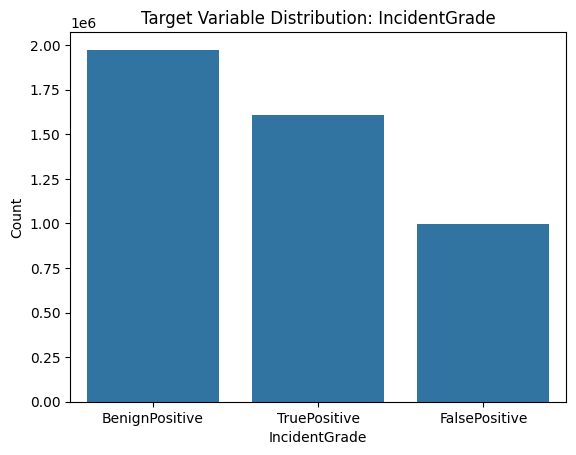

In [76]:
sns.countplot(data=train_data, x='IncidentGrade', order=train_data['IncidentGrade'].value_counts().index)
plt.title('Target Variable Distribution: IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

In [27]:
num_test_features = [feature for feature in test_data.columns if test_data[feature].dtype != 'O']
num_test_features

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'OSFamily',
 'OSVersion',
 'CountryCode',
 'State',
 'City',
 'Year',
 'Month',
 'Day',
 'Hour',
 'DayOfWeek',
 'isWeekend']

In [ ]:
cat_test_features = [feature for feature in test_data.columns if test_data[feature].dtype == 'O']
cat_test_features

['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

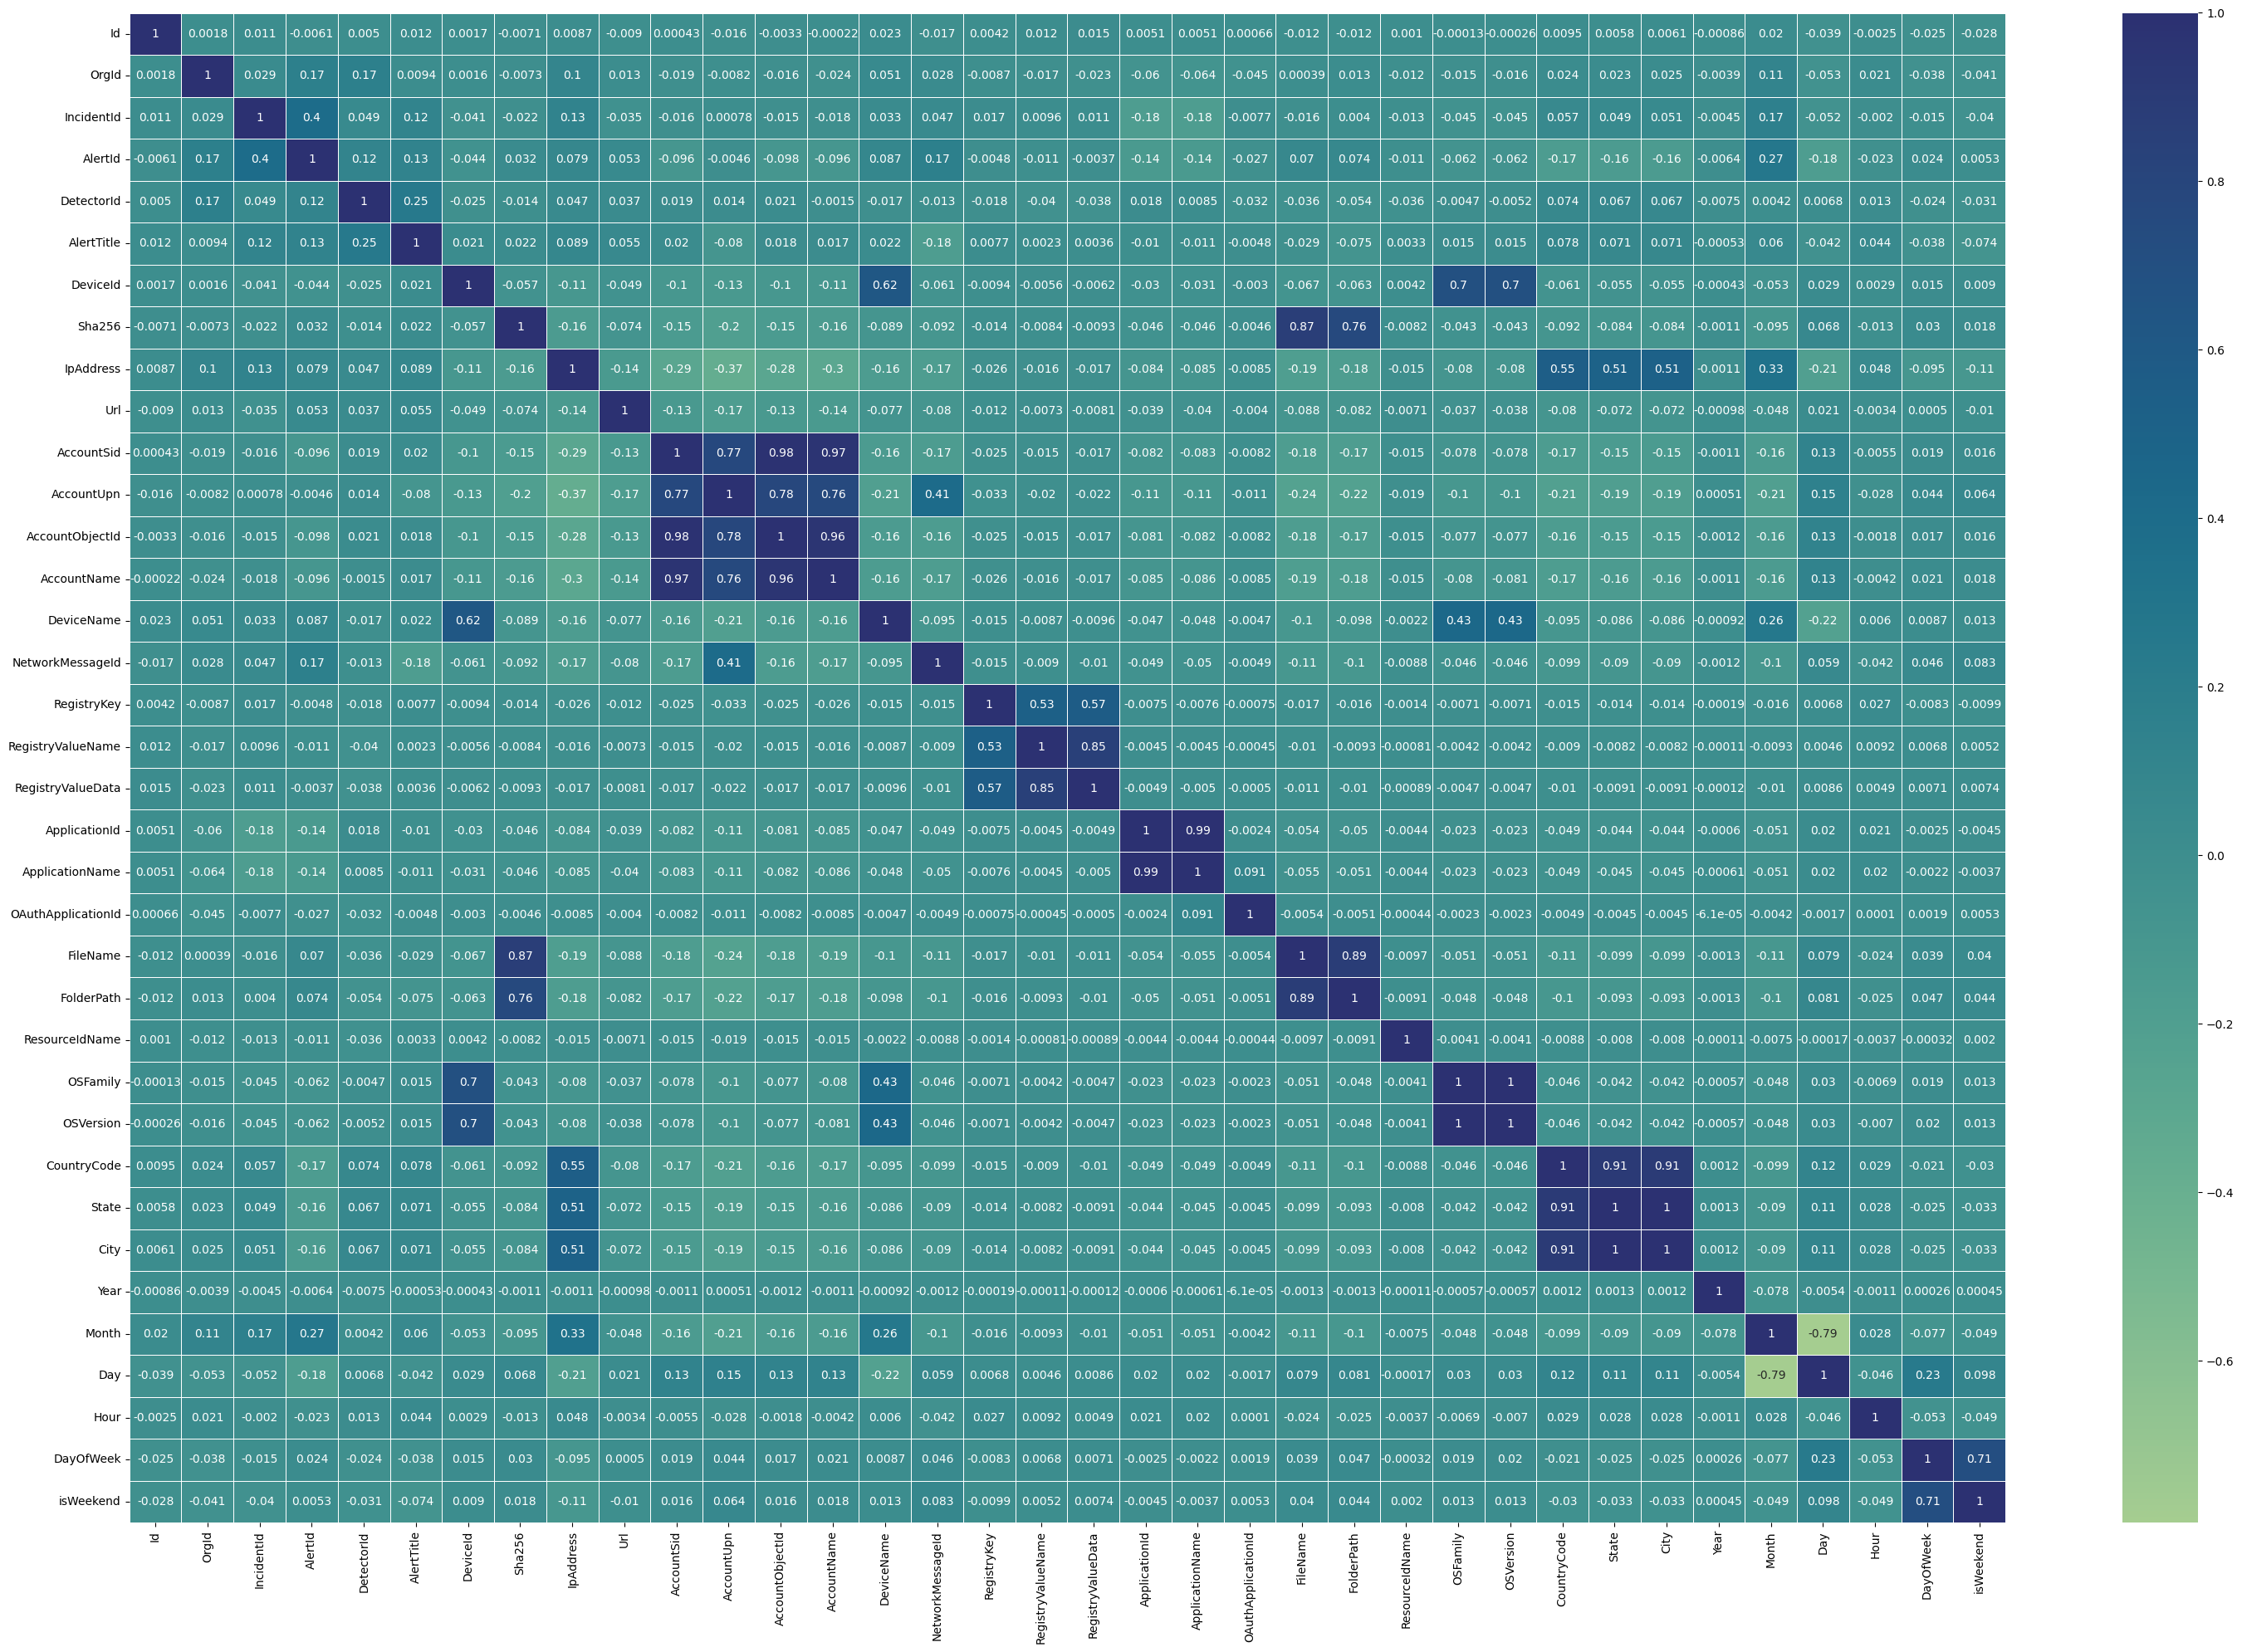

In [ ]:
plt.figure(figsize = (30, 20))
sns.heatmap(test_data[num_test_features].corr(), cmap = 'crest', annot = True, linewidth = 0.5)
plt.tight_layout()
plt.show()